In [2]:
'''
계층적[hierarchy] 군집 분석 
 - 계층적 군집분석(Hierarchical Clustering)
 - 거리가 가장 가까운 대상부터 결합하여 나무모양의 
   계층구조를 상향식(Bottom-up)으로 만들어가면서 군집을 형성 
'''
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram # 군집분석 tool
import matplotlib.pyplot as plt

In [3]:
# 1. dataset load
iris = pd.read_csv("C:/Users/hyebin/Desktop/study/python_ML/data/iris.csv")
print(iris.info(),"\n")
col_names = list(iris.columns)
iris_x = iris[col_names[:-1]]
print(iris_x.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None 

(150, 4)


In [4]:
X, y = load_iris(return_X_y=True)
print(y) # Species(0~2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
labels = pd.DataFrame(y, columns = ['labels'])
labels.head() # labels

,labels
0,0
1,0
2,0
3,0
4,0


In [6]:
# concat = DF1 + DF2
irisDF = pd.concat([iris_x, labels], axis = 1) # 칼럼 단위 병합 
print(irisDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   labels        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [7]:
# 2. 계층적 군집분석 
clusters = linkage(y=irisDF, method='complete', metric='euclidean')

# method = 'complete' : default - 완전연결 
# method = 'simple' : 단순연결
# method = 'average' : 평균연결

clusters.shape # (149, 4)

(149, 4)

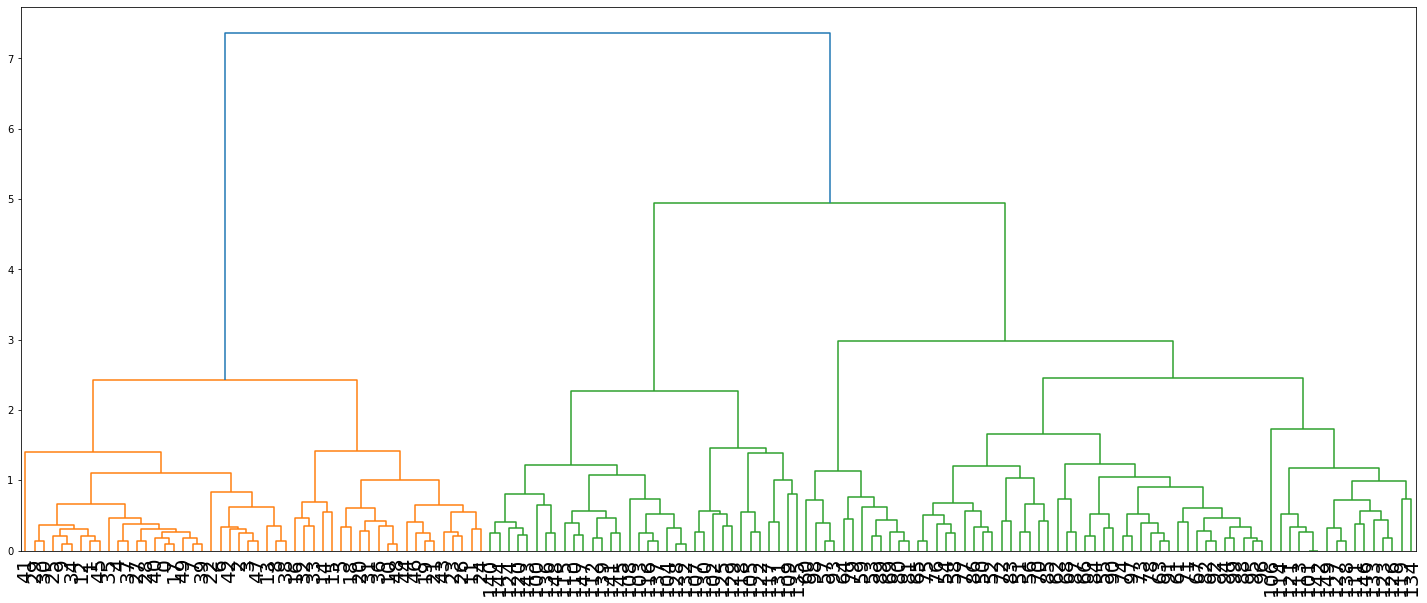

In [8]:
# 3. 텐드로그램 시각화 : 군집수는 사용자가 결정 
plt.figure(figsize = (25, 10))
dendrogram(clusters, leaf_rotation=90,
           leaf_font_size=20,)
plt.show()


In [13]:
# 4. 클러스터링 결과/평가 
from scipy.cluster.hierarchy import fcluster # 클러스터 자르기 

cpred = fcluster(clusters, t=3, criterion='distance')
print(cpred) # 1 ~ 3

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]


In [18]:
# raw data -> 군집수 추가 
irisDF['cluster'] = cpred
irisDF.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,labels,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


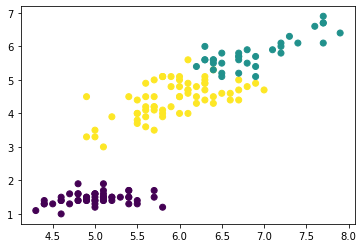

In [14]:
# 산점도 시각화 
plt.scatter(x=irisDF['Sepal.Length'], 
            y=irisDF['Petal.Length'], c=irisDF.cluster)
plt.show()

In [10]:
# 4) 예측치(cpred) vs 정답(y)
labels = irisDF['labels']
labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int32

In [14]:
# 교차분할표 : 평가 
tab = pd.crosstab(index=labels, columns=cpred)
tab

col_0,1,2,3
labels,,,
0,50,0,0
1,0,0,50
2,0,34,16


In [16]:
# 6. 각 군집에 대한 특성분석 
'''
숫자변수 : 통계(평균, 표준편차) 분석 
집단변수 : 각 범주 분석 
'''
irisDF.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
iris_g = irisDF.groupby('cluster') # 집단변수 그룹 객체 
print(iris_g.size())

cluster
1    50
2    34
3    66
dtype: int64


In [20]:
print(iris_g.mean())

         Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    labels
cluster                                                                
1            5.006000     3.428000      1.462000     0.246000  0.000000
2            6.888235     3.100000      5.805882     2.123529  2.000000
3            5.939394     2.754545      4.442424     1.445455  1.242424
